# Machine Learning Workshop

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from visualization import *

## Generate data

In [5]:
# Set seed for reproducibility
SEED = 1

# Generate a linear regression dataset
X, y = datasets.make_regression(
    n_samples=100, 
    n_features=1, 
    noise=10,
    random_state=SEED,
    bias=100.0
)
X = X.flatten() * 5 # Makes this example more interesting

# Display first few samples of the dataset
print("First 5 samples of the dataset:")
for i in range(5):
    print(f"X: {X[i]:.2f}, y: {y[i]:.2f}")

First 5 samples of the dataset:
X: -3.06, y: 47.54
X: -1.25, y: 84.61
X: 2.44, y: 131.09
X: 3.81, y: 181.30
X: 7.60, y: 233.50


## Split the data into train, validation, and test sets

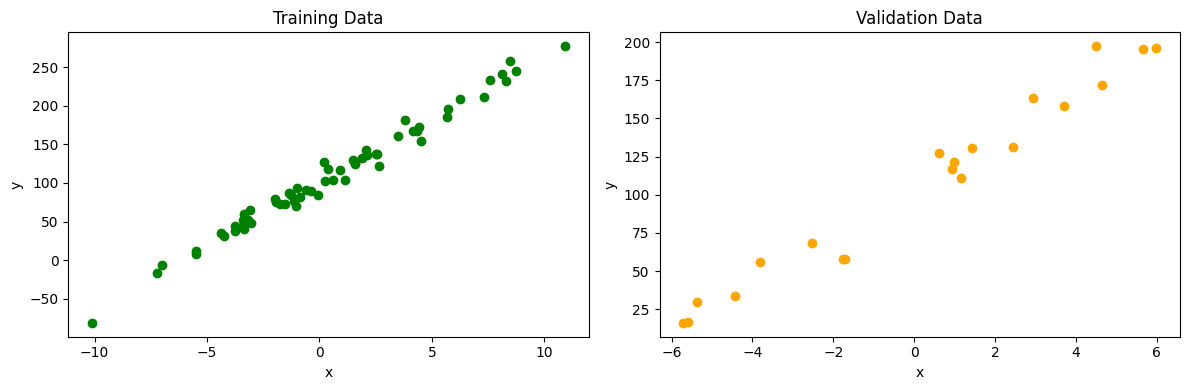

In [6]:
# Split the data into train, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=True, random_state=SEED)

# Scale the data using mean and standard deviation and using only training data statistics
# X_mean = np.mean(X_train)
# X_std = np.std(X_train)
# X_train = (X_train - X_mean) / X_std
# X_val = (X_val - X_mean) / X_std
# X_test = (X_test - X_mean) / X_std

# y_mean = np.mean(y_train)
# y_std = np.std(y_train)
# y_train = (y_train - y_mean) / y_std
# y_val = (y_val - y_mean) / y_std
# y_test = (y_test - y_mean) / y_std


plot_train_val_data(X_train, y_train, X_val, y_val)

## Functions for linear regression

In [7]:
def predict(X: np.ndarray, weights: np.ndarray) -> np.ndarray:
    """Compute predictions using linear regression"""
    
    return weights[1] * X + weights[0]


def compute_loss_and_gradient(X: np.ndarray, y: np.ndarray, weights: np.ndarray) -> tuple[float, np.ndarray]:
    """
    Computes both MSE loss and its gradient in a single pass through the data
    
    Returns:
        tuple: (loss, gradient)
    """
    errors = y - predict(X, weights)
    loss = (errors**2).mean()
    gradient = -2.0 * np.array([errors.mean(), (X * errors).mean()])
    return loss, gradient

    
def gradient_descent(
    X: np.ndarray, 
    y: np.ndarray,
    weights: np.ndarray=np.array([0, 0]),
    learning_rate: float=0.1,
    iterations: int=1000,
) -> np.ndarray:
    """
    Iteratively updates the weights using the steepest descent method
    """
    for _ in range(iterations):
        _, gradient = compute_loss_and_gradient(X, y, weights)
        weights = weights - learning_rate * gradient

    return weights

## Run gradient descent

Found weights: [101.19251194  16.39903253]


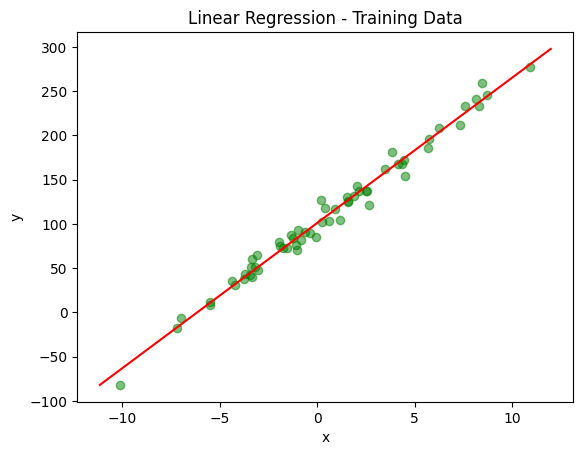

In [8]:
# Run gradient descent
weights = gradient_descent(X_train, y_train, learning_rate=0.005, iterations=1000)

print(f"Found weights: {weights}")

plot_linear_regression(X_train, y_train, weights, title="Linear Regression - Training Data")

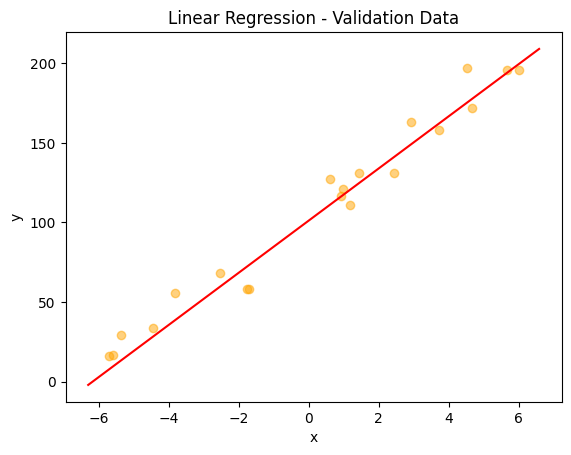

In [9]:
plot_linear_regression(X_val, y_val, weights, title="Linear Regression - Validation Data", scatter_color="orange")


## Run hyperparameter search

Learning rate = 0.00500 | Iterations = 100	MSE on validation set: 1794.7146521976033
Learning rate = 0.00500 | Iterations = 500	MSE on validation set: 129.30781512372113
Learning rate = 0.00500 | Iterations = 1000	MSE on validation set: 123.71374533934147
Learning rate = 0.00500 | Iterations = 2000	MSE on validation set: 123.67702656916472
Learning rate = 0.00100 | Iterations = 100	MSE on validation set: 7526.756451983754
Learning rate = 0.00100 | Iterations = 500	MSE on validation set: 1806.7309906139512
Learning rate = 0.00100 | Iterations = 1000	MSE on validation set: 421.4699940207476
Learning rate = 0.00100 | Iterations = 2000	MSE on validation set: 141.48356097646078
Learning rate = 0.00010 | Iterations = 100	MSE on validation set: 12278.69860716155
Learning rate = 0.00010 | Iterations = 500	MSE on validation set: 9052.601221154668
Learning rate = 0.00010 | Iterations = 1000	MSE on validation set: 7528.252913138279
Learning rate = 0.00010 | Iterations = 2000	MSE on validation set

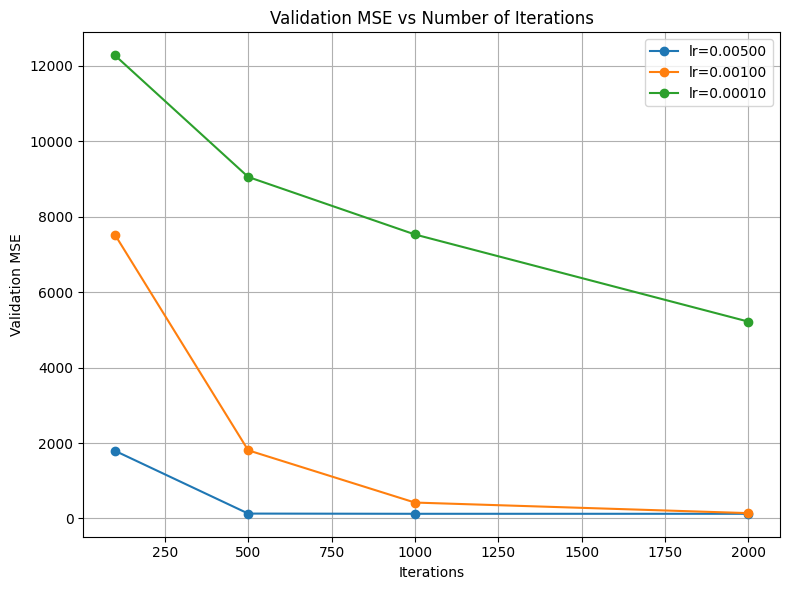

In [10]:
learning_rates = [0.005, 0.001, 0.0001]
iterations = [100, 500, 1000, 2000]

best_learning_rate = None
best_iterations = None
best_weights = None
best_mse_val_loss = float('inf')

validation_results = {'lr': [], 'iterations': [], 'mse': []}

for learning_rate in learning_rates:
    for iteration in iterations:
        weights = gradient_descent(X_train, y_train, learning_rate=learning_rate, iterations=iteration)
        mse_val_loss, _ = compute_loss_and_gradient(X_val, y_val, weights)
        
        # Store results for plotting
        validation_results['lr'].append(learning_rate)
        validation_results['iterations'].append(iteration)
        validation_results['mse'].append(mse_val_loss)
        
        print(f"Learning rate = {learning_rate:.5f} | Iterations = {iteration}\tMSE on validation set: {mse_val_loss}")
        
        if mse_val_loss < best_mse_val_loss:
            best_mse_val_loss = mse_val_loss
            best_weights = weights
            best_learning_rate = learning_rate
            best_iterations = iteration


plot_validation_results(learning_rates, validation_results)


Best learning rate: 0.00500
Best iterations: 2000
Best MSE on validation set: 123.67702656916472


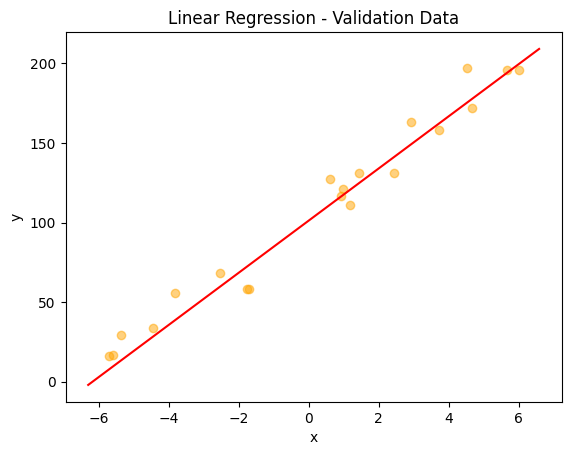

In [11]:
print(f"\nBest learning rate: {best_learning_rate:.5f}")
print(f"Best iterations: {best_iterations}")
print(f"Best MSE on validation set: {best_mse_val_loss}")

plot_linear_regression(X_val, y_val, best_weights, title="Linear Regression - Validation Data", scatter_color="orange")

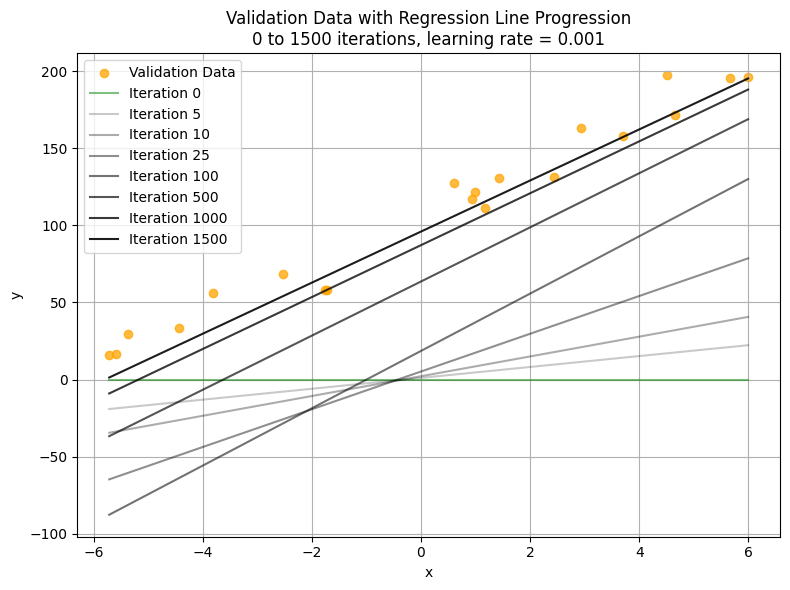

In [12]:
plot_regression_progression(X_train, y_train, X_val, y_val, gradient_descent)


## Evaluate on test set

MSE on test set: 56.02111415613731


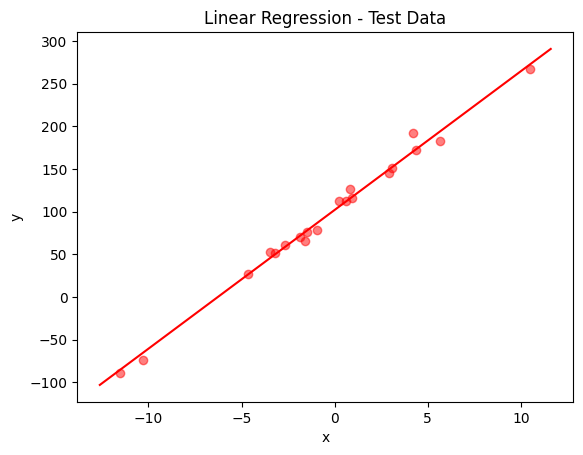

In [13]:
# Combine train and validation sets
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])

# Train the model on combined data with best hyperparameters
weights = gradient_descent(X_combined, y_combined, learning_rate=best_learning_rate, iterations=best_iterations)

# Evaluate on test set
mse_test_loss, _ = compute_loss_and_gradient(X_test, y_test, weights)
print(f"MSE on test set: {mse_test_loss}")


plot_linear_regression(X_test, y_test, weights, title="Linear Regression - Test Data", scatter_color="red")

## Visualize gradient descent on loss surface

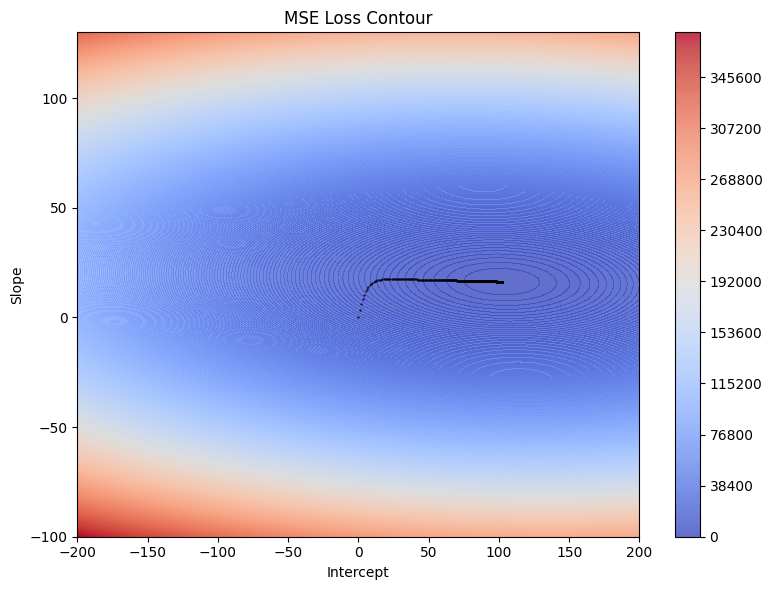

In [14]:
plot_loss_surface(X, y, compute_loss_and_gradient, dim='2d', lr=best_learning_rate, n_iter=best_iterations, init_weights=[0, 0])


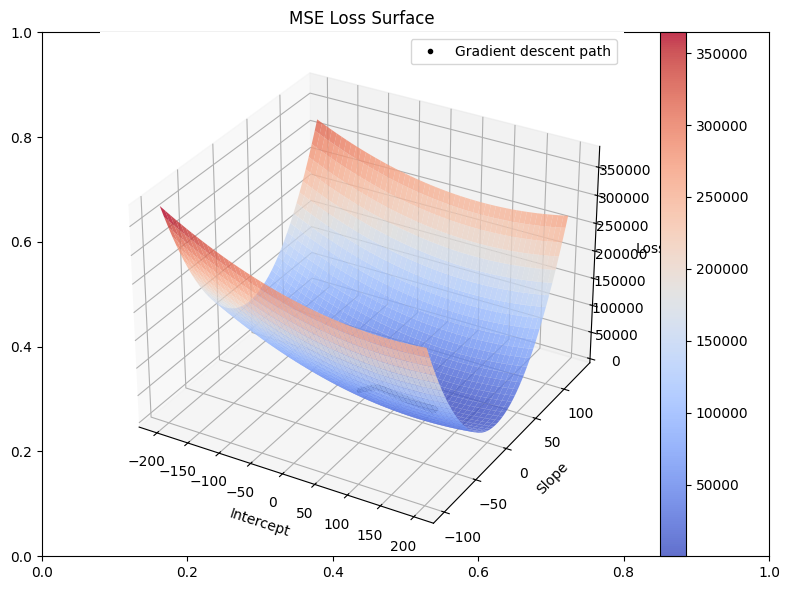

In [15]:
plot_loss_surface(X, y, compute_loss_and_gradient, dim='3d', lr=best_learning_rate, n_iter=best_iterations, init_weights=[0, 0])

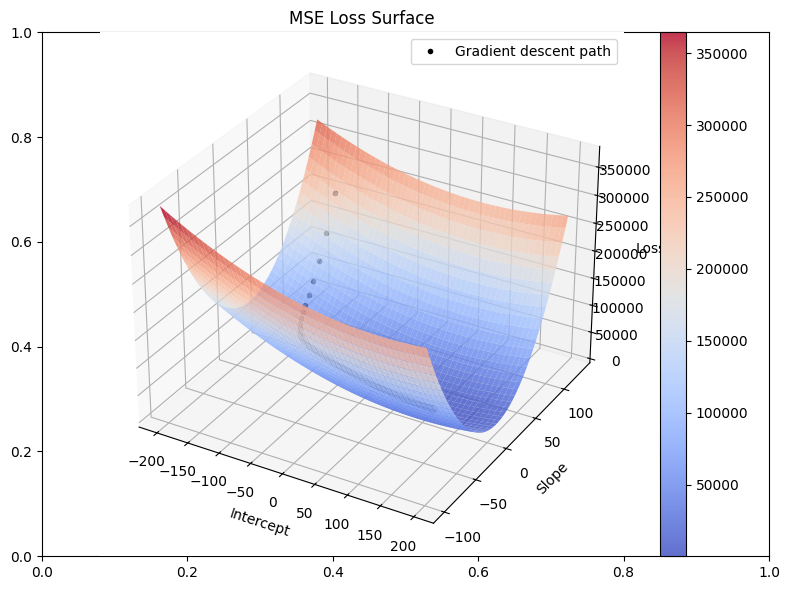

In [16]:
plot_loss_surface(X, y, compute_loss_and_gradient, dim='3d', lr=0.005, n_iter=500, init_weights=[-150, 110])

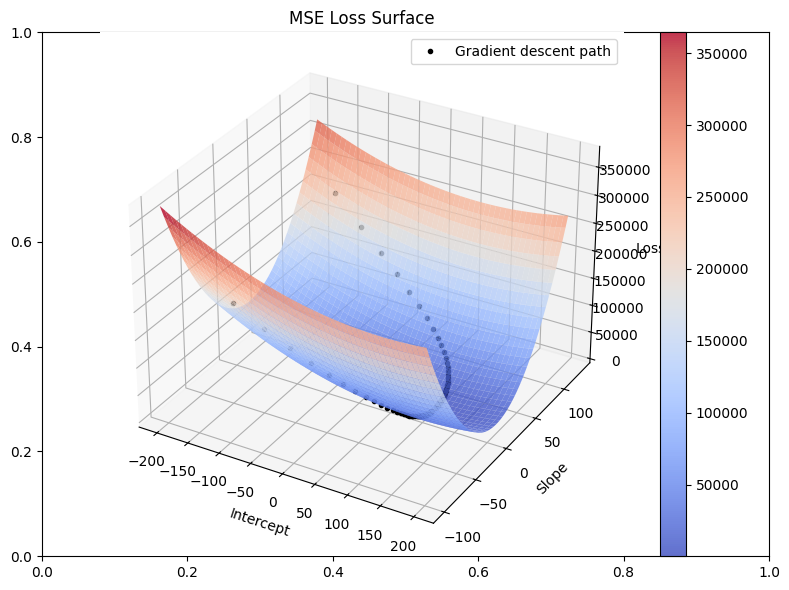

In [17]:
plot_loss_surface(X, y, compute_loss_and_gradient, dim='3d', lr=0.05, n_iter=100, init_weights=[-150, 110])